In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
file_path = "../data/facebook_combined.txt"

# Load edge list
G = nx.read_edgelist(file_path, nodetype=int)

print("Graph loaded successfully!")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Graph loaded successfully!
Number of nodes: 4039
Number of edges: 88234


In [3]:
print("=== Network Information ===")
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Directed Graph: {G.is_directed()}")
print(f"Graph Density: {nx.density(G):.6f}")

=== Network Information ===
Nodes: 4039
Edges: 88234
Directed Graph: False
Graph Density: 0.010820


In [4]:
# Degree dictionary
degrees = dict(G.degree())

# Convert to dataframe
degree_df = pd.DataFrame(list(degrees.items()),
                         columns=["Node", "Degree"])

degree_df.head()

,Node,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10


In [5]:
def get_node_degree(node_id):
    if node_id in G:
        return f"Node {node_id} → Degree {G.degree[node_id]}"
    else:
        return "Node not found"

# Example
print(get_node_degree(915))

Node 915 → Degree 35


In [6]:
adj_matrix = nx.adjacency_matrix(G)

print("Adjacency matrix shape:", adj_matrix.shape)

Adjacency matrix shape: (4039, 4039)


In [7]:
adj_df = pd.DataFrame(adj_matrix.toarray())
adj_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ego_networks = {}

for node in G.nodes():
    ego_networks[node] = nx.ego_graph(G, node)

print("Total ego networks created:", len(ego_networks))

Total ego networks created: 4039


In [9]:
ego_915 = ego_networks[915]

print("Nodes in ego network:", ego_915.number_of_nodes())
print("Edges in ego network:", ego_915.number_of_edges())

Nodes in ego network: 36
Edges in ego network: 260


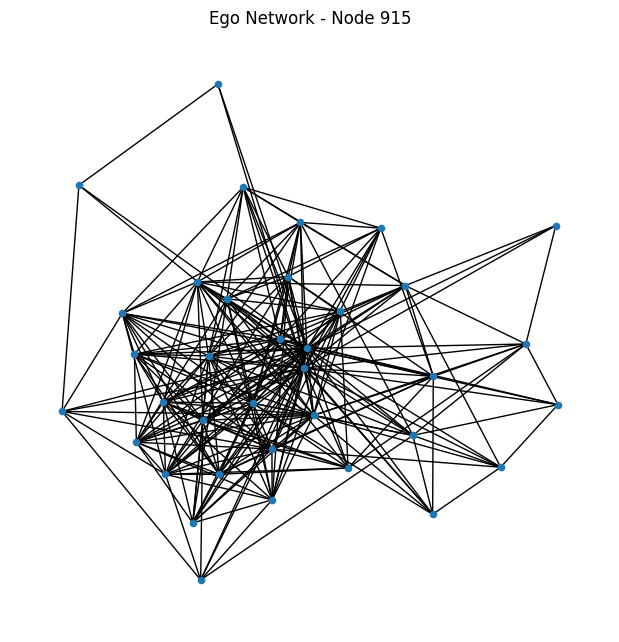

In [10]:
plt.figure(figsize=(6,6))
nx.draw(ego_915,
        node_size=20,
        with_labels=False)

plt.title("Ego Network - Node 915")
plt.show()

In [11]:
degree_df.to_csv("../results/node_degrees.csv", index=False)
print("Degrees saved!")

Degrees saved!


In [ ]:
#interface
#use the input "exit" to leave the interface
while True:
    node = input("Enter node id (or 'exit'): ")

    if node.lower() == "exit":
        break

    try:
        node = int(node)
        print(get_node_degree(node))
    except:
        print("Invalid input")